#### Pavlo Yatluk
#### dz_42

### ЗАВДАННЯ

#### Застосуйте методи кластеризації на датасеті винних сортів UCI ML Wine Data Set. Завантажити його можна командою datasets.load_wine. Результати кластеризацій оформіть у вигляді файлу ipynb.

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans

In [7]:
# загружаємо дані датасету

UCI_ML_Wine_Data_Set = datasets.load_wine()
UCI_ML_Wine_Data_Set

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

### Кластеризація методом к - середніх

In [8]:
# формування та тренування моделі

model = KMeans(n_clusters=3)
model.fit(UCI_ML_Wine_Data_Set.data)

C:\Users\Pavel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [9]:
# отримання очікуваних даних

predictions = model.predict(UCI_ML_Wine_Data_Set.data)
predictions

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0])

In [11]:
# призначаємо об’єктам датасету номери кластерів відповідно до того, як їх розподілив алгоритм

cluster_0 = UCI_ML_Wine_Data_Set.data[predictions == 0]
cluster_1 = UCI_ML_Wine_Data_Set.data[predictions == 1]
cluster_2 = UCI_ML_Wine_Data_Set.data[predictions == 2]

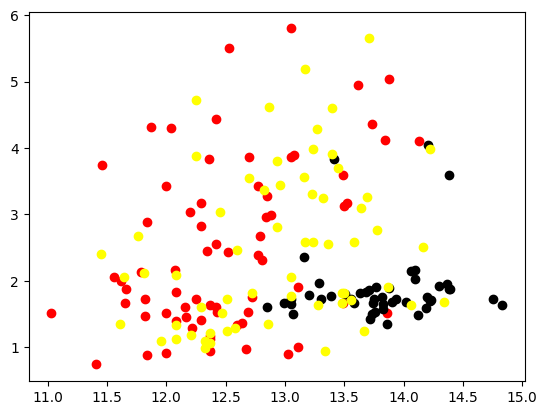

In [12]:
# візуалізуємо об”єкти кожного кластеру 

plt.scatter(cluster_0[:,0] , cluster_0[:,1] , color = 'red')
plt.scatter(cluster_1[:,0] , cluster_1[:,1] , color = 'black')
plt.scatter(cluster_2[:,0] , cluster_2[:,1] , color = 'yellow')

### Кластеризація на основі щільності (DBSCAN)

In [15]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [16]:
# задаємо параметри кластеризації - відстань та кількість сусідів

dbscan = DBSCAN(eps=0.4, min_samples=4)

In [17]:
# тренуємо модель

dbscan.fit(UCI_ML_Wine_Data_Set.data)

DBSCAN(eps=0.4, min_samples=4)

In [19]:
# задаємо параметри візуалізації

pca = PCA(n_components=2).fit(UCI_ML_Wine_Data_Set.data)
pca_2d = pca.transform(UCI_ML_Wine_Data_Set.data)

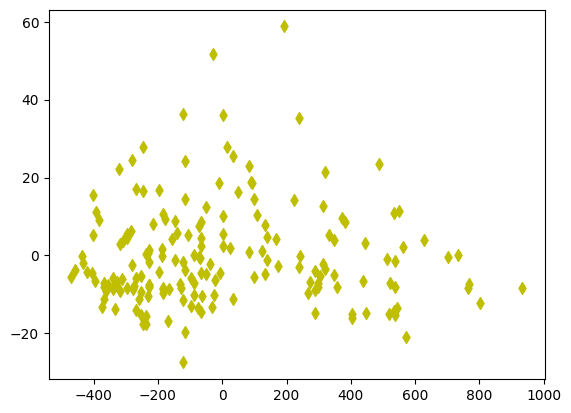

In [20]:
# візуалізуємо результати кластеризації

for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='y', marker='d')

### Ієрархічний кластерний аналіз



In [21]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [22]:
# формуємо модель кластеризації

In [23]:
mergings = linkage(UCI_ML_Wine_Data_Set.data, method = 'complete')

In [ ]:
# візуалізуемо результати кластеризації

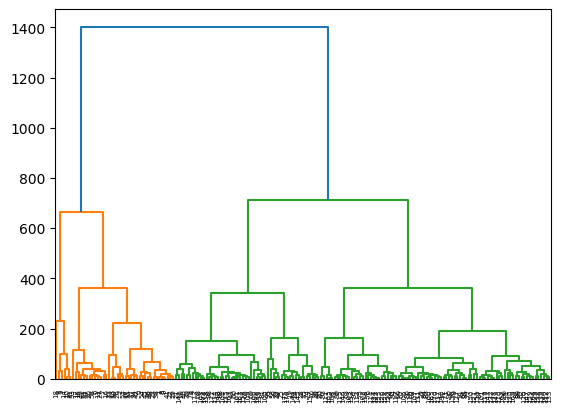

In [24]:
clusters = dendrogram(mergings,leaf_rotation=90)